# Medical Insurance Cost Prediction - Group 13
# Group Members: Nanditha Chevula, Netra Amin, Yusuf Kshem, Anudeepthi Senthil Kumar

# How to Run This Notebook:
# 1. Install required libraries: pandas, numpy, matplotlib, seaborn, sklearn
# 2. Place the dataset (e.g., medical_insurance.csv) in the same directory as this notebook.
# 3. Run all cells from top to bottom.

# **Explanatory Data Analysis**

In [6]:
import pandas as pd
eda_df = pd.read_csv('medical_insurance.csv')
print("Mean of charges and bmi")
print(f'\tmean of charges: {eda_df['charges'].mean()}')
print(f'\tmean of bmi: {eda_df['bmi'].mean()}\n')

print("Median of charges and bmi")
print(f'\tmedian of charges: {eda_df['charges'].median()}')
print(f'\tmedian of bmi: {eda_df['bmi'].median()}\n')

print("Standard Deviation of charges and bmi")
print(f'\tStandard Deviation of charges: {eda_df['charges'].std()}')
print(f'\tStandard Deviation of bmi: {eda_df['bmi'].std()}\n')

print("Count of categorical variables")
print(f'\tcount of sex: {eda_df['sex'].value_counts()}')
print(f'\tcount of smoker: {eda_df['smoker'].value_counts()}')
print(f'\tcount of region: {eda_df['region'].value_counts()}\n')

print("Min and Max of charges")
print(f'\tmin of charges: {eda_df['charges'].min()}')
print(f'\tmax of charges: {eda_df['charges'].max()}')

Mean of charges and bmi
	mean of charges: 13261.369959046897
	mean of bmi: 30.70134920634921

Median of charges and bmi
	median of charges: 9333.014350000001
	median of bmi: 30.447499999999998

Standard Deviation of charges and bmi
	Standard Deviation of charges: 12151.768945168045
	Standard Deviation of bmi: 6.1294486949652205

Count of categorical variables
	count of sex: sex
male      1406
female    1366
Name: count, dtype: int64
	count of smoker: smoker
no     2208
yes     564
Name: count, dtype: int64
	count of region: region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

Min and Max of charges
	min of charges: 1121.8739
	max of charges: 63770.42801


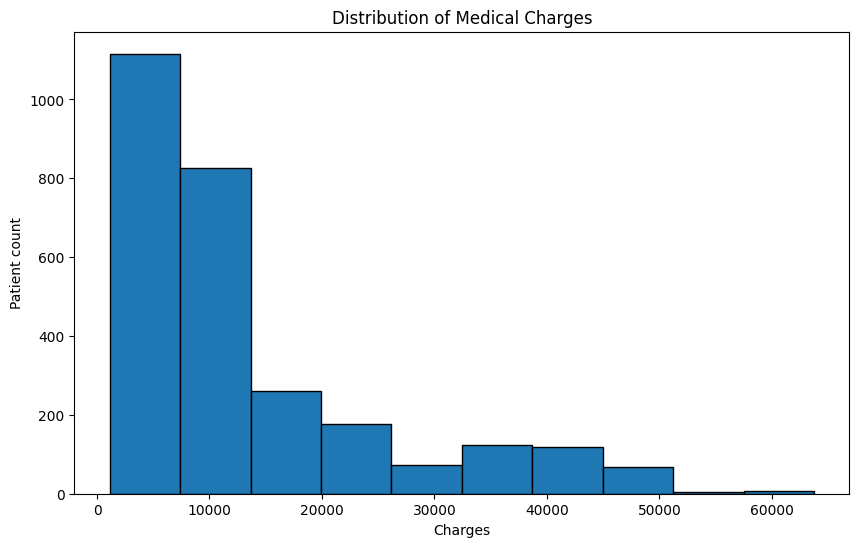

In [7]:
import matplotlib.pyplot as plt
fix,ax = plt.subplots(figsize=(10,6))
ax.hist(eda_df['charges'], edgecolor = 'black')
ax.set_title('Distribution of Medical Charges')
ax.set_xlabel('Charges')
ax.set_ylabel('Patient count')
plt.show()

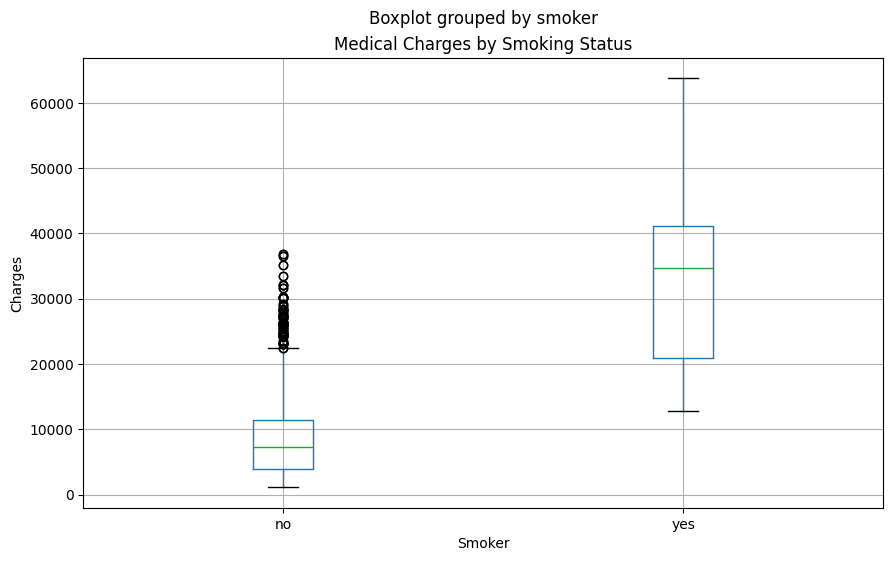

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
eda_df.boxplot(column='charges', by='smoker', ax=ax)
ax.set_title('Medical Charges by Smoking Status')
ax.set_xlabel('Smoker')
ax.set_ylabel('Charges')
plt.show()

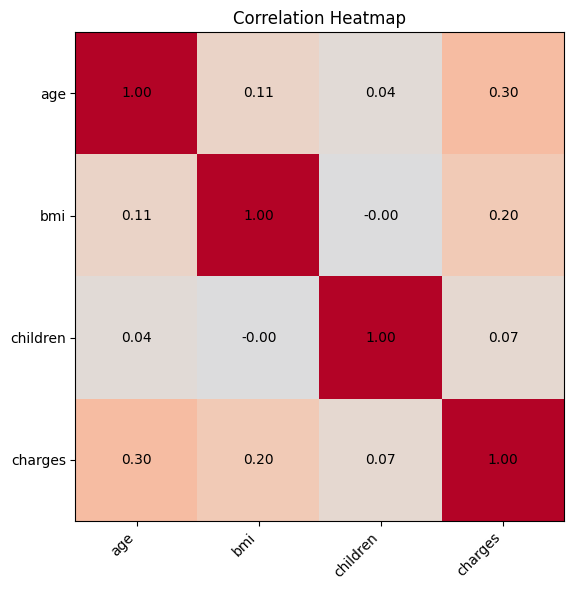

In [9]:
import numpy as np
corr = eda_df.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

# Title and layout
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

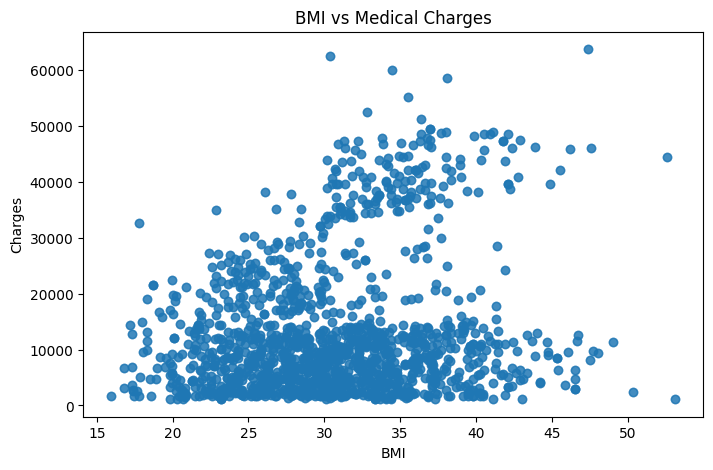

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(eda_df['bmi'], eda_df['charges'], alpha=0.6)
ax.set_title('BMI vs Medical Charges')
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
plt.show()

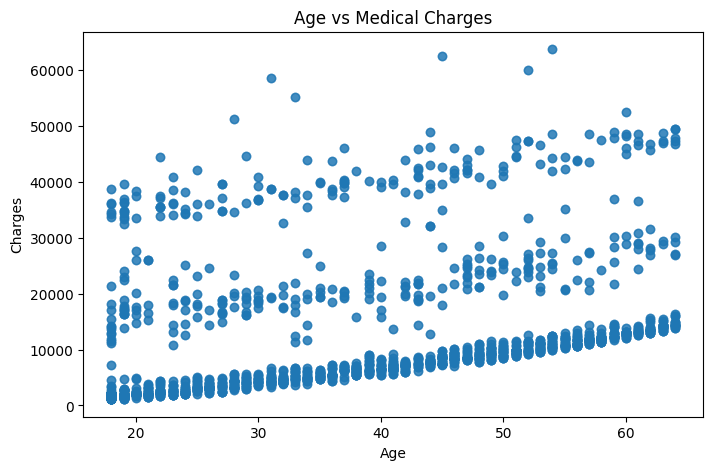

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(eda_df['age'], eda_df['charges'], alpha=0.6)
ax.set_title('Age vs Medical Charges')
ax.set_xlabel('Age')
ax.set_ylabel('Charges')
plt.show()


# **Linear Regression**

Linear Regression Performance:
MAE:  4160.25
MSE:  39933194.55
RMSE: 6319.27
R²:   0.7398


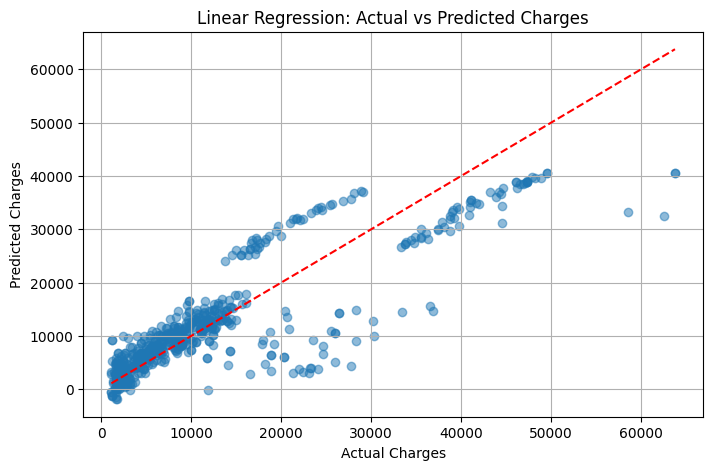

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('medical_insurance.csv')

# One-hot encoding of categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Feature/Target split
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Linear Regression Performance:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# **Decision Tree Regression**


=== Evaluation Metrics ===
MAE: 2529.42
MSE: 21541341.60
RMSE: 4641.27
R²: 0.860


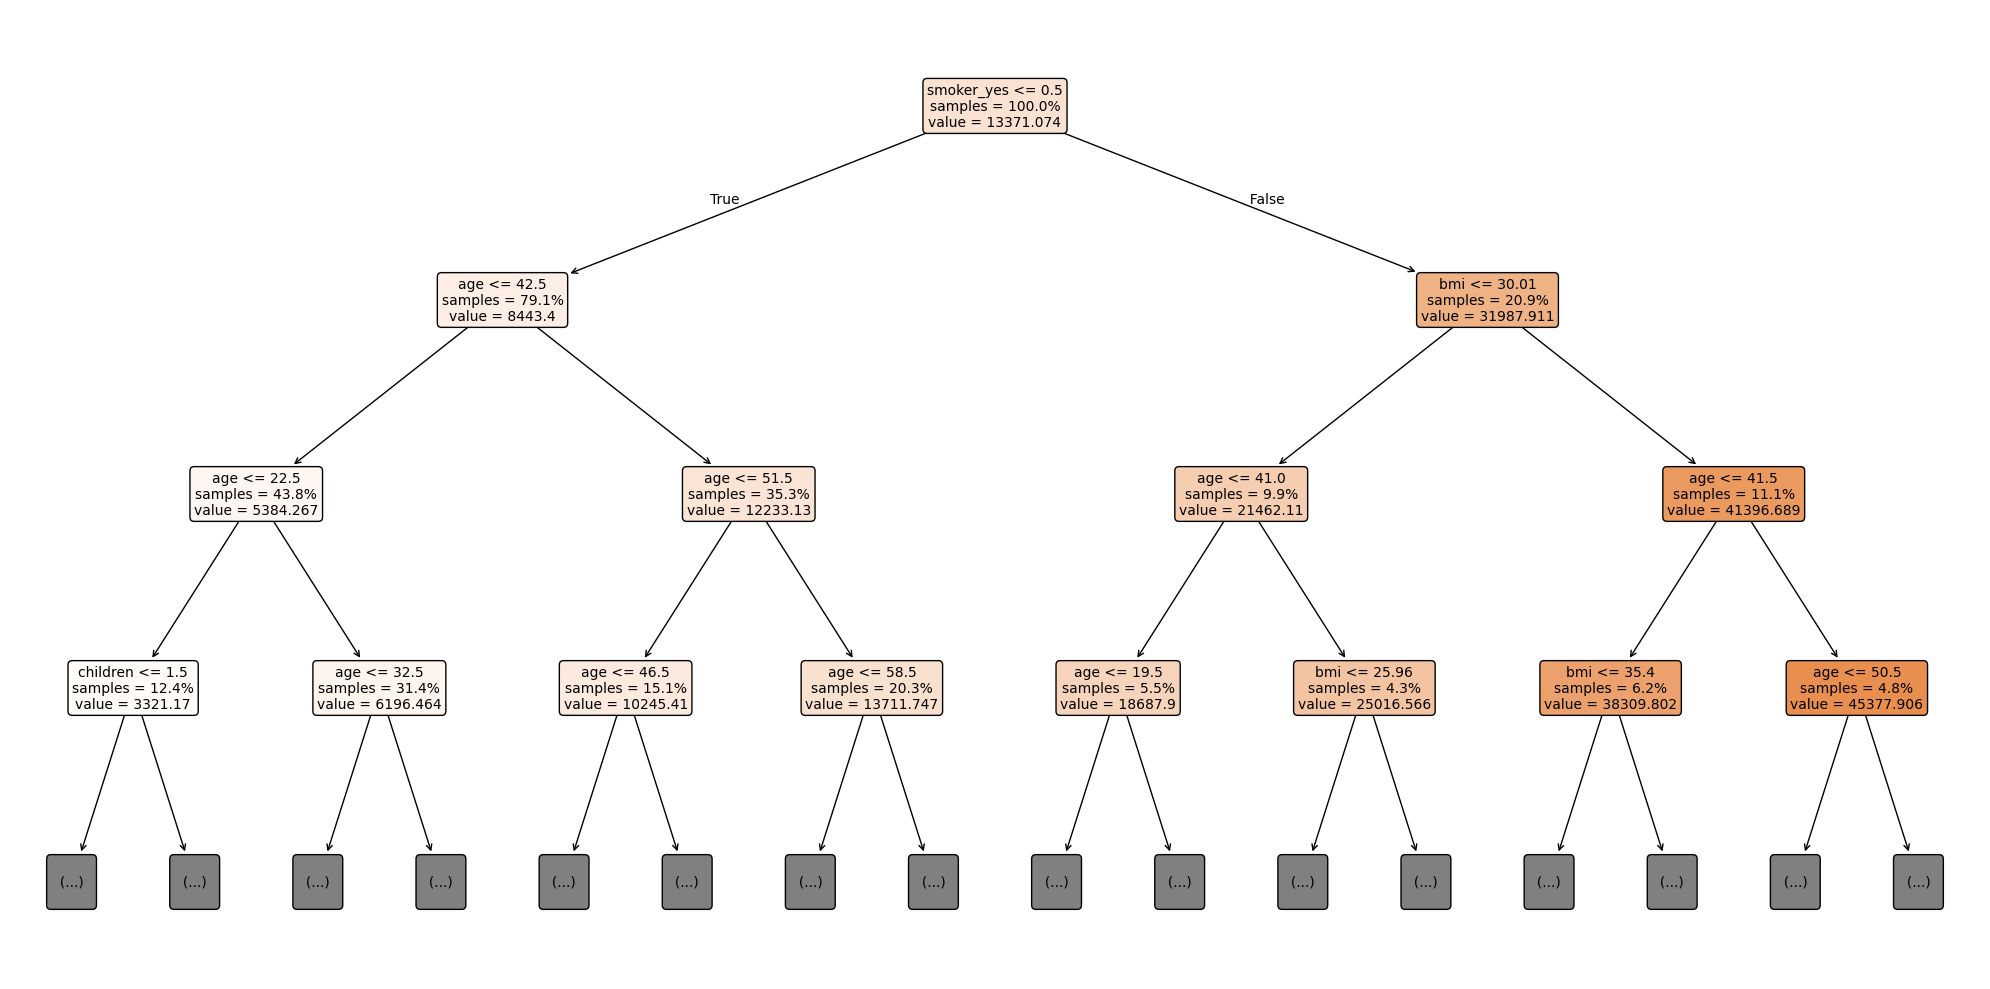

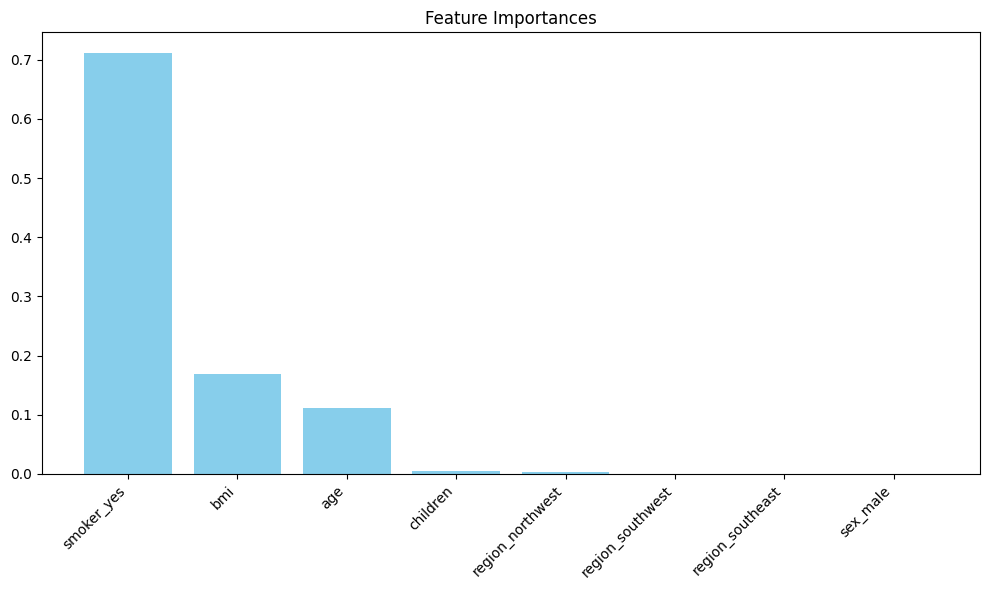


Selected features by RFE:
- smoker_yes
- region_northwest
- age
- bmi
- children


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("medical_insurance.csv")

# Split features and target
X = df.drop("charges", axis=1)
y = df["charges"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define categorical columns
categorical = ['sex', 'smoker', 'region']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

# Full model pipeline
model = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeRegressor(max_depth=5, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\n=== Evaluation Metrics ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

# Get feature names after encoding
encoded_features = model.named_steps['pre'].named_transformers_['cat'].get_feature_names_out(categorical)
all_features = list(encoded_features) + ['age', 'bmi', 'children']

# Pruned Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(
    model.named_steps['tree'],
    feature_names=all_features,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3,      # Showing only first 3 levels to keep it simple
    impurity=False,
    proportion=True
)
plt.tight_layout()
plt.show()

# --- 2. Feature Importance Bar Chart ---
importances = model.named_steps['tree'].feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = [all_features[i] for i in indices]
sorted_importances = importances[indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(sorted_features)), sorted_importances, color='skyblue')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3. Recursive Feature Elimination (RFE) ---

rfe_selector = RFE(
    estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
    n_features_to_select=5
)

pipeline_rfe = Pipeline([
    ('pre', preprocessor),
    ('rfe', rfe_selector)
])

pipeline_rfe.fit(X_train, y_train)

selected_mask = pipeline_rfe.named_steps['rfe'].support_
selected_features = [f for f, selected in zip(all_features, selected_mask) if selected]

print("\nSelected features by RFE:")
for feat in selected_features:
    print(f"- {feat}")


# **Random Forest Regression**

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
df_rf = pd.read_csv('medical_insurance.csv')

# One-hot encoding of categorical variables
dfrf_encoded = pd.get_dummies(df_rf, columns=['sex', 'smoker', 'region'], drop_first=True)

# Feature/Target splot
X = dfrf_encoded.drop('charges', axis=1)
y = dfrf_encoded['charges']

# Train-test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators = 100, random_state=42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#Evaluation Metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Absolute Error: {mae}\n Mean Squared Error: {mse}\n Root Mean Sequared Error: {rmse}\n R Squared = {r2}')


Mean Absolute Error: 1280.8420688983072
 Mean Squared Error: 7598268.140603724
 Root Mean Sequared Error: 2756.495626806566
 R Squared = 0.9504937401980953


In [16]:
#Feature Selection:
#Using feature improtances
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance',ascending=False)
print(importance_df)

            Feature  Importance
4        smoker_yes    0.629522
1               bmi    0.208609
0               age    0.124689
2          children    0.016624
3          sex_male    0.005723
5  region_northwest    0.005685
6  region_southeast    0.004962
7  region_southwest    0.004185


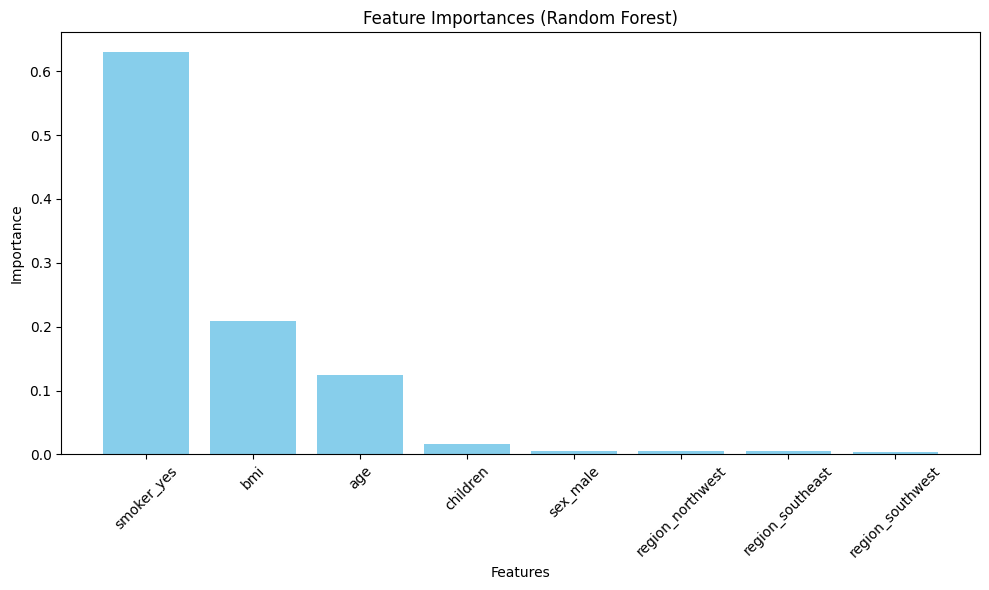

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df_new = pd.read_csv('medical_insurance.csv')


df_encoded = pd.get_dummies(df_new, columns=['sex', 'smoker', 'region'], drop_first=True)

# Feature/Target split
X_selected = df_encoded.drop('charges', axis=1)
y_selected = df_encoded['charges']

#using only the selected columns based on the featured importances
X_selected = X_selected[['smoker_yes', 'bmi', 'age', 'children']]

# Train-test split and model
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)
rfs = RandomForestRegressor(n_estimators = 100, random_state=42)
rfs.fit(Xs_train, ys_train)
ys_train_pred = rfs.predict(Xs_train)
ys_test_pred = rfs.predict(Xs_test)

#Evaluation Metrics
mae = mean_absolute_error(ys_test, ys_test_pred)
mse = mean_squared_error(ys_test, ys_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ys_test, ys_test_pred)

print(f'Mean Absolute Error: {mae}\n Mean Squared Error: {mse}\n Root Mean Sequared Error: {rmse}\n R Squared = {r2}')


Mean Absolute Error: 1388.838445591711
 Mean Squared Error: 9076994.039651327
 Root Mean Sequared Error: 3012.8050118869837
 R Squared = 0.9408591514761133


# **Gradient Boosting Regression (LightGBM)**

In [19]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install seaborn

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 2217, number of used features: 8
[LightGBM] [Info] Start training from score 13371.074037


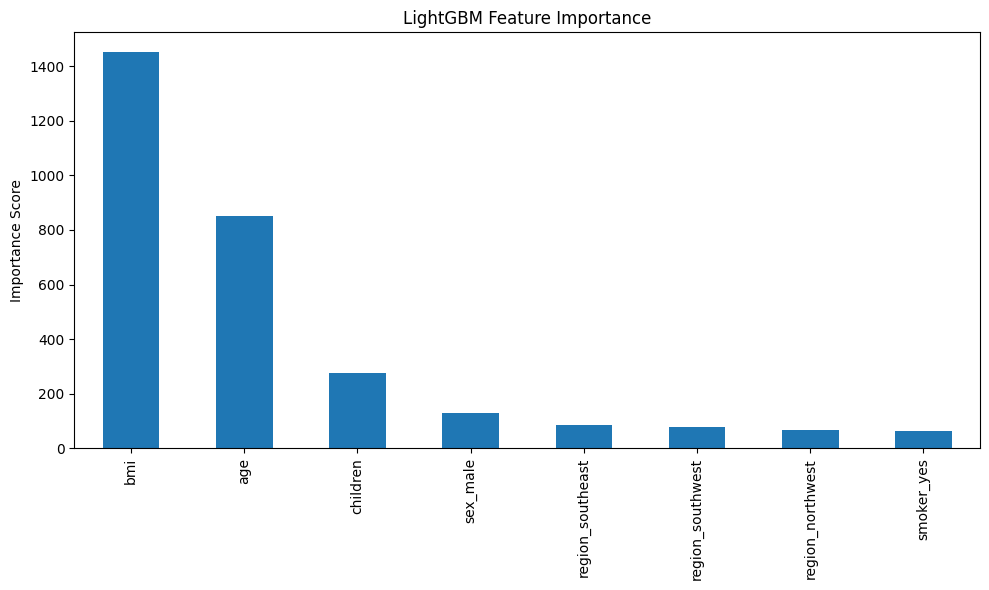

In [28]:
# Gradient Boosting Regression (LightGBM)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("medical_insurance.csv")

df_encoded = pd.get_dummies(df, drop_first=True)

# Define features
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict
y_pred = lgb_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importance
importances = pd.Series(lgb_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot Graph
plt.figure(figsize=(10, 6))
importances.plot(kind="bar")
plt.title("LightGBM Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2166.43
Mean Squared Error (MSE): 14737041.03
Root Mean Squared Error (RMSE): 3838.89
R² Score: 0.9040
